In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/Jasonnyang/AgricultureML.git

Cloning into 'AgricultureML'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 36 (delta 17), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (36/36), 8.52 MiB | 10.11 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [3]:
df = pd.read_csv('AgricultureML/ICRISAT-District Level Data.csv')
df.head()


Dist Code  Year  State Code    State Name Dist Name  RICE AREA (1000 ha)  \
0          1  1966          14  Chhattisgarh      Durg                548.0   
1          1  1967          14  Chhattisgarh      Durg                547.0   
2          1  1968          14  Chhattisgarh      Durg                556.3   
3          1  1969          14  Chhattisgarh      Durg                563.4   
4          1  1970          14  Chhattisgarh      Durg                571.6   

   RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  WHEAT AREA (1000 ha)  \
0                        185.0                  337.59                  44.0   
1                        409.0                  747.71                  50.0   
2                        468.0                  841.27                  53.7   
3                        400.8                  711.40                  49.4   
4                        473.6                  828.55                  44.2   

   WHEAT PRODUCTION (1000 tons)  ...  SUGARCANE YIELD (Kg per ha)  \
0                          20.0  ...                      1777.78   
1                          26.0  ...                      1500.00   
2                          30.0  ...                      1000.00   
3                          26.5  ...                      1900.00   
4                          29.0  ...                      2000.00   

   COTTON AREA (1000 ha)  COTTON PRODUCTION (1000 tons)  \
0                    0.0                            0.0   
1                    0.0                            0.0   
2                    0.0                            0.0   
3                    0.0                            0.0   
4                    0.0                            0.0   

   COTTON YIELD (Kg per ha)  FRUITS AREA (1000 ha)  VEGETABLES AREA (1000 ha)  \
0                       0.0                   5.95                       6.64   
1                       0.0                   5.77                       7.24   
2                       0.0                   5.41                       7.40   
3                       0.0                   5.52                       7.16   
4                       0.0                   5.45                       7.19   

   FRUITS AND VEGETABLES AREA (1000 ha)  POTATOES AREA (1000 ha)  \
0                                 12.59                     0.01   
1                                 13.02                     0.01   
2                                 12.81                     0.10   
3                                 12.69                     0.01   
4                                 12.64                     0.02   

   ONION AREA (1000 ha)  FODDER AREA (1000 ha)  
0                  0.60                   0.47  
1                  0.56                   1.23  
2                  0.58                   1.02  
3                  0.56                   0.84  
4                  0.52                   0.42  

[5 rows x 80 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

In [5]:
df.describe() # number of observations, data distribution and scale

Dist Code          Year    State Code  RICE AREA (1000 ha)  \
count  16146.000000  16146.000000  16146.000000         16146.000000   
mean     269.769231   1991.496841      9.568562           128.593192   
std      278.309125     15.011185      4.988538           160.078825   
min        1.000000   1966.000000      1.000000            -1.000000   
25%       78.000000   1978.000000      6.000000            10.400000   
50%      156.000000   1991.000000     10.000000            66.800000   
75%      241.000000   2005.000000     12.000000           191.390000   
max      917.000000   2017.000000     20.000000          1154.230000   

       RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  \
count                 16146.000000            16146.000000   
mean                    224.889565             1486.924784   
std                     326.629828              956.185281   
min                      -1.000000               -1.000000   
25%                       9.460000              800.000000   
50%                      95.840000             1333.210000   
75%                     315.715000             2113.517500   
max                    3215.010000             5653.830000   

       WHEAT AREA (1000 ha)  WHEAT PRODUCTION (1000 tons)  \
count          16146.000000                  16146.000000   
mean              77.057946                    182.012746   
std              100.394479                    348.834254   
min               -1.000000                     -1.000000   
25%                1.770000                      2.000000   
50%               36.800000                     42.700000   
75%              123.000000                    215.192500   
max              879.490000                   4305.500000   

       WHEAT YIELD (Kg per ha)  KHARIF SORGHUM AREA (1000 ha)  ...  \
count             16146.000000                   16146.000000  ...   
mean               1492.419859                      22.632268  ...   
std                1081.255367                      45.062714  ...   
min                  -1.000000                      -1.000000  ...   
25%                 750.000000                       0.000000  ...   
50%                1347.450000                       2.050000  ...   
75%                2131.580000                      20.900000  ...   
max                5541.520000                     334.800000  ...   

       SUGARCANE YIELD (Kg per ha)  COTTON AREA (1000 ha)  \
count                  16146.00000           16146.000000   
mean                    4500.15306              28.018367   
std                     3153.97042              74.239648   
min                       -1.00000              -1.000000   
25%                     2000.00000               0.000000   
50%                     4502.21000               0.050000   
75%                     6704.60500              10.097500   
max                    22062.30000             800.890000   

       COTTON PRODUCTION (1000 tons)  COTTON YIELD (Kg per ha)  \
count                   16146.000000              16146.000000   
mean                        7.229225                124.644823   
std                        25.042132                207.681147   
min                        -1.000000                 -1.000000   
25%                         0.000000                  0.000000   
50%                         0.000000                  0.000000   
75%                         2.000000                202.270000   
max                       376.610000               5000.000000   

       FRUITS AREA (1000 ha)  VEGETABLES AREA (1000 ha)  \
count           16146.000000               16146.000000   
mean                7.750478                  11.086250   
std                13.591135                  18.003257   
min                -1.000000                  -1.000000   
25%                 0.310000                   1.600000   
50%                 2.220000                   4.740000   
75%                 8.790000                  12.510000   
max 

In [6]:
# Check for missing data
missing_data = (df == -1).sum() # The missing values are represented by -1
missing_data[missing_data > 0]


RICE AREA (1000 ha)                      22
RICE PRODUCTION (1000 tons)              22
RICE YIELD (Kg per ha)                   22
WHEAT AREA (1000 ha)                     35
WHEAT PRODUCTION (1000 tons)             35
                                       ... 
VEGETABLES AREA (1000 ha)               289
FRUITS AND VEGETABLES AREA (1000 ha)    287
POTATOES AREA (1000 ha)                  34
ONION AREA (1000 ha)                    317
FODDER AREA (1000 ha)                   887
Length: 75, dtype: int64

In [7]:
print(df.columns) # column descriptions

Index(['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name',
       'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)',
       'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)',
       'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)',
       'KHARIF SORGHUM AREA (1000 ha)',
       'KHARIF SORGHUM PRODUCTION (1000 tons)',
       'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)',
       'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)',
       'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)',
       'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)',
       'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)',
       'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)',
       'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)',
       'FINGER MILLET PRODUCTION (1000 tons)',
       'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)',
       'BARLEY PRODUCTION (1000 tons)', 'BARLEY 

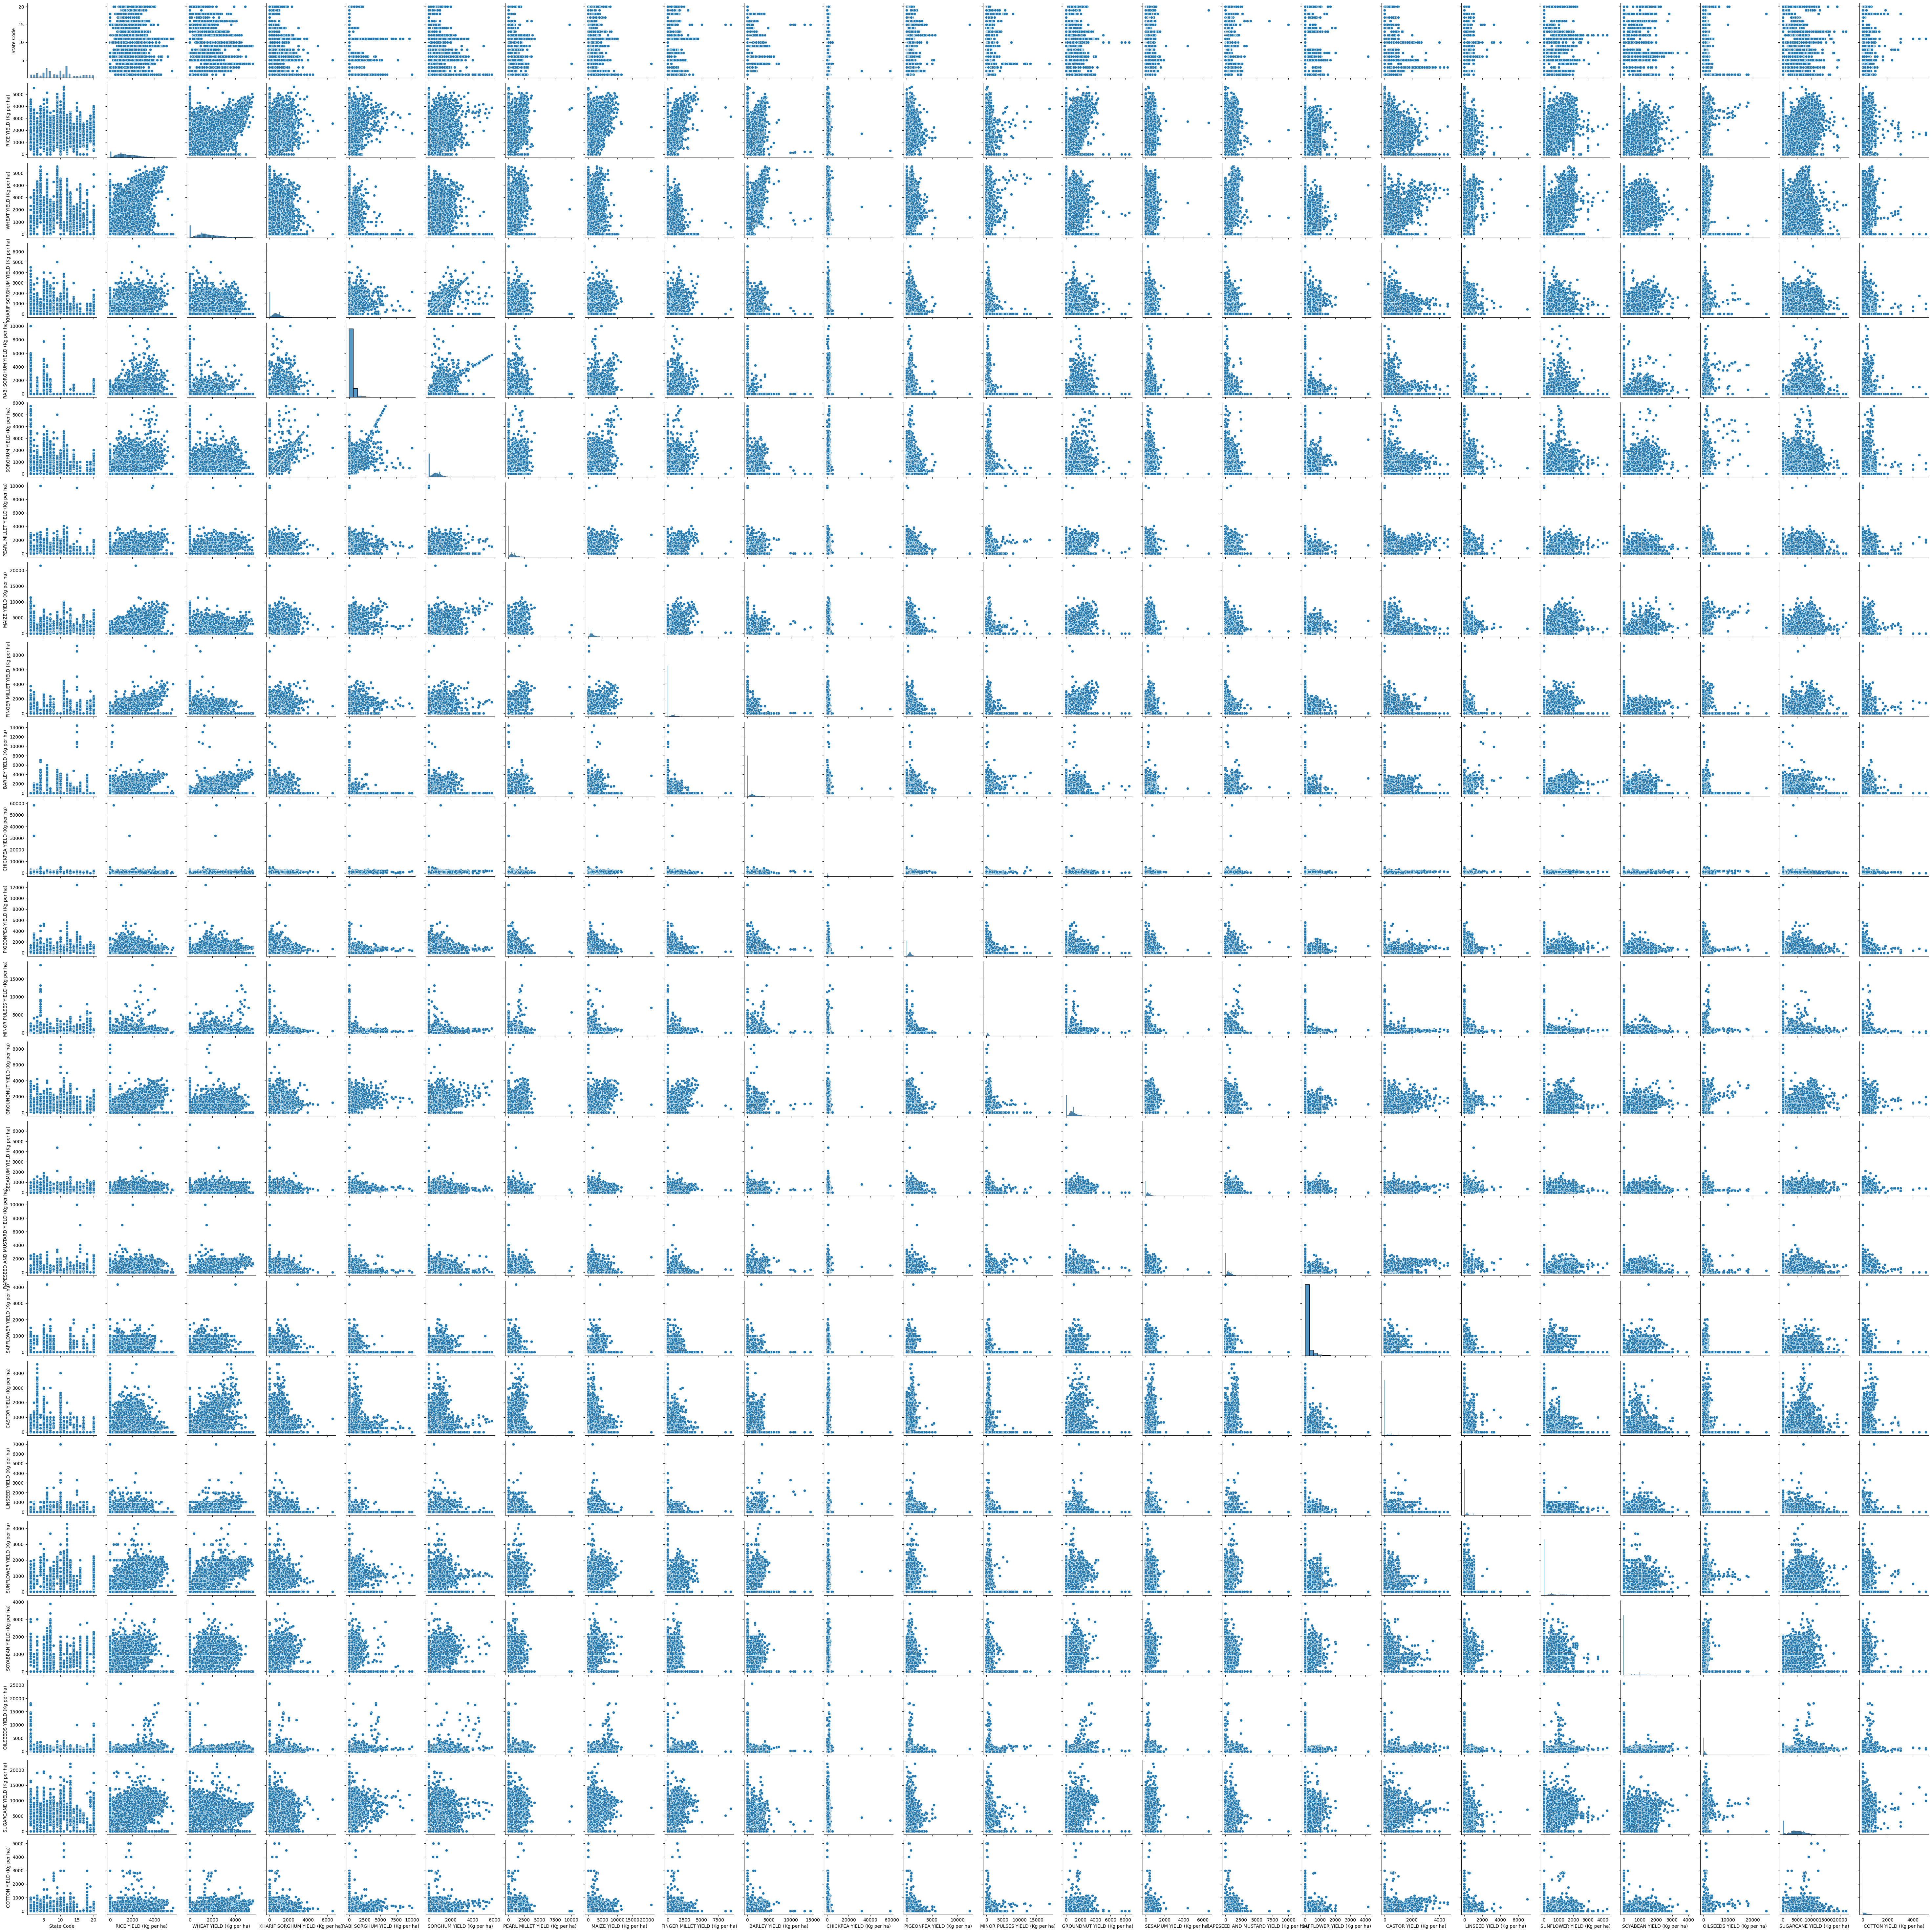

KeyboardInterrupt: 

In [8]:
# Plot histograms for numerical columns

cols = ['State Code',
       'RICE YIELD (Kg per ha)',
        'WHEAT YIELD (Kg per ha)',
        'KHARIF SORGHUM YIELD (Kg per ha)',
        'RABI SORGHUM YIELD (Kg per ha)',
       'SORGHUM YIELD (Kg per ha)',
       'PEARL MILLET YIELD (Kg per ha)',
       'MAIZE YIELD (Kg per ha)',
       'FINGER MILLET YIELD (Kg per ha)',
        'BARLEY YIELD (Kg per ha)',
       'CHICKPEA YIELD (Kg per ha)',
        'PIGEONPEA YIELD (Kg per ha)',
       'MINOR PULSES YIELD (Kg per ha)',
        'GROUNDNUT YIELD (Kg per ha)',
       'SESAMUM YIELD (Kg per ha)',
       'RAPESEED AND MUSTARD YIELD (Kg per ha)',
        'SAFFLOWER YIELD (Kg per ha)',
       'CASTOR YIELD (Kg per ha)',
        'LINSEED YIELD (Kg per ha)',
       'SUNFLOWER YIELD (Kg per ha)',
       'SOYABEAN YIELD (Kg per ha)',
       'OILSEEDS YIELD (Kg per ha)',
        'SUGARCANE YIELD (Kg per ha)',
       'COTTON YIELD (Kg per ha)']

sns.pairplot(df[cols])

df.hist(bins=50, figsize=(20,15))
plt.show()

In [22]:
#Preprocess the data and remove all -1 which represent missing values

data = df[['State Code',
       'RICE YIELD (Kg per ha)',
        'WHEAT YIELD (Kg per ha)',
        'KHARIF SORGHUM YIELD (Kg per ha)',
        'RABI SORGHUM YIELD (Kg per ha)',
       'SORGHUM YIELD (Kg per ha)',
       'PEARL MILLET YIELD (Kg per ha)',
       'MAIZE YIELD (Kg per ha)',
       'FINGER MILLET YIELD (Kg per ha)',
        'BARLEY YIELD (Kg per ha)',
       'CHICKPEA YIELD (Kg per ha)',
        'PIGEONPEA YIELD (Kg per ha)',
       'MINOR PULSES YIELD (Kg per ha)',
        'GROUNDNUT YIELD (Kg per ha)',
       'SESAMUM YIELD (Kg per ha)',
       'RAPESEED AND MUSTARD YIELD (Kg per ha)',
        'SAFFLOWER YIELD (Kg per ha)',
       'CASTOR YIELD (Kg per ha)',
        'LINSEED YIELD (Kg per ha)',
       'SUNFLOWER YIELD (Kg per ha)',
       'SOYABEAN YIELD (Kg per ha)',
       'OILSEEDS YIELD (Kg per ha)',
        'SUGARCANE YIELD (Kg per ha)',
       'COTTON YIELD (Kg per ha)']]

# Replace -1 with NaN
data.replace(-1, np.nan, inplace=True)

# Drop rows with any NaN values
data.dropna(inplace=True)

print(data.describe())

         State Code  RICE YIELD (Kg per ha)  WHEAT YIELD (Kg per ha)  \
count  13654.000000            13654.000000             13654.000000   
mean       9.263146             1569.443659              1559.785105   
std        4.864407              984.571072              1118.161113   
min        1.000000                0.000000                 0.000000   
25%        6.000000              843.907500               769.230000   
50%        9.000000             1458.775000              1427.740000   
75%       12.000000             2233.192500              2260.032500   
max       20.000000             5653.830000              5541.520000   

       KHARIF SORGHUM YIELD (Kg per ha)  RABI SORGHUM YIELD (Kg per ha)  \
count                      13654.000000                    13654.000000   
mean                         631.920273                      259.333149   
std                          575.155280                      588.004744   
min                            0.000000            

<ipython-input-22-53c3030daf72>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(-1, np.nan, inplace=True)
<ipython-input-22-53c3030daf72>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

# Assuming `df` is your DataFrame and you've preprocessed your data
X = data.drop(['State Code'], axis=1)  # Features
y = data['State Code']  # Target variable

#Min Max normalization on X
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Performance
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Evaluation
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

print("Training error : " + str(train_mse))
print("Testing error : " + str(test_mse))

[[ 83   0   0   0   8   0   1   0   0   0  18   0   0   0   0   0   0   0
    0   5]
 [  0  58   0   0   0   1   0   0   1   0   0   6   1   0   5   0   0   0
    0   0]
 [  1   0 155   2   3   0   5   3   0   2   0   0   0   1   0   0   0   0
    0   2]
 [  0   0   0  31   0   0   0   0   9   6   0   2   1   0   0   0   0   0
    0   0]
 [ 17   0   1   0 162   0  20   1   0   0   8   0   1   0   0   0   0   0
    0  11]
 [  0   1   2   0   0 318   7   0   0  21   0   4   0   8   1   1   0   1
    0   0]
 [  3   0   4   0  20   8 188   3   0   0   5   0   3   0   2   0   0   1
    5   3]
 [  0   3   1   0   0   0   1  86   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   5   0   3   0   0  88   3   0   7   2   0   0   0   0   3
    0   0]
 [  0   0   0   5   0  24   1   0   7 219   0  10   0   0   1   0   0   3
    0   0]
 [  9   0   0   0   6   0   0   0   0   0  92   0   0   1   0   0   0   0
    1   4]
 [  0   1   0   2   0  13   0   0   1  11   0 320   1   0   0   1

In [30]:
#Model 2

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
rf = RandomForestClassifier()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit it to the data
grid_search.fit(X_train, y_train)

# You can find the best parameters and the best score like this
print(grid_search.best_params_)
print(grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
0.9625555108507055


In [31]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(**grid_search.best_params_)  # Using the best parameters from the hyperparameter tuning
scores = cross_val_score(rf, X, y, cv=5)  # 5-fold cross-validation

print("Accuracy scores for each fold:", scores)
print("Mean cross-validation score:", scores.mean())


Accuracy scores for each fold: [0.77956792 0.91724643 0.86671549 0.83376053 0.81282051]
Mean cross-validation score: 0.842022176529683


In [34]:
from sklearn.metrics import accuracy_score, mean_squared_error
rf.fit(X_train, y_train)
train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)

train_error = mean_squared_error(y_train, train_preds)
test_error = mean_squared_error(y_test, test_preds)

print(f"Train Error: {train_error}")
print(f"Test Error: {test_error}")

Train Error: 0.013366291311910647
Test Error: 2.048333943610399
